Goal: ground truth -> best threshold -> predicted annotations  

Ground truth: the true labels used to train txt2onto models.  
Best threshold: fbeta-score cut off value on the predictions (probabilities) from txt2onto models.  
predicted annotation: the classified binary annotation by applying the best threshold.  
1. ground truth (x) -> best threshold (y): explore how the best threshild is compared to the ground truth from which the best threshold is generated.  
2. best threshold (x) -> predicted annotation (y): explore how the predicted annotation is compared to the best threshild from which the predicted annotion is generated.  

Date: 2025-07-22  
Author: Junxia Lin  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [10]:
# import the data
prior_df = pd.read_csv("../data/true_label__inst_type=sample__task=tissue.csv.gz", compression="gzip", sep=",")
ic_df = pd.read_csv("../data/UBERON_IC.csv", sep=",")
log2auprc_df = pd.read_csv("../data/tissue_model_stats.csv", sep=",")
best_th_df_f1 = pd.read_csv("../results/f1.0_best_threshold.csv", sep = "\t")
samplelasso_label_f1 = pd.read_csv("../results/sampleLASSO_labels_prior_pos_predpos_f1.csv", sep=",")
best_th_df_f05 = pd.read_csv("../results/f0.5_best_threshold.csv", sep = "\t")
samplelasso_label_f05 = pd.read_csv("../results/sampleLASSO_labels_prior_pos_predpos_f05.csv", sep=",")
id_map = pl.read_parquet("../data/id_map.parquet")

In [11]:
id_map = id_map.to_pandas()
id_map.head()

,id,name
0,BFO:0000001,entity
1,BFO:0000002,continuant
2,BFO:0000003,occurrent
3,BFO:0000004,independent continuant
4,BFO:0000006,spatial region


In [ ]:
# f1: best threshold
best_th_df_f1["log2(best_th/prior)"] = np.log2(best_th_df_f1["best_threshold"]/best_th_df_f1["prior"])
best_th_df_f1 = best_th_df_f1.merge(id_map, left_on="task", right_on="id", how="left")
best_th_df_f1 = best_th_df_f1.drop(columns=["id"])
best_th_df_f1.head()

,task,best_threshold,prior,log2(auprc/prior),log2(best_th/prior),id,name
0,UBERON:0002435,0.002176,0.002955,7.703480,-0.441290,UBERON:0002435,striatum
1,UBERON:0000955,0.282196,0.045098,4.470791,2.645560,UBERON:0000955,brain
2,UBERON:0002020,0.963025,0.004940,7.285049,7.606876,UBERON:0002020,gray matter
3,UBERON:0000165,0.003090,0.002557,7.174555,0.272976,UBERON:0000165,mouth
4,CL:0000576,0.363368,0.002162,8.853621,7.393123,CL:0000576,monocyte


In [14]:
# f0.5: best threshold
best_th_df_f05["log2(best_th/prior)"] = np.log2(best_th_df_f05["best_threshold"]/best_th_df_f05["prior"])
best_th_df_f05 = best_th_df_f05.merge(id_map, left_on="task", right_on="id", how="left")
best_th_df_f05 = best_th_df_f05.drop(columns=["id"])
best_th_df_f05.head()

,task,best_threshold,prior,log2(auprc/prior),log2(best_th/prior),name
0,UBERON:0002435,0.002176,0.002955,7.703480,-0.441290,striatum
1,UBERON:0000955,0.282196,0.045098,4.470791,2.645560,brain
2,UBERON:0002020,0.963025,0.004940,7.285049,7.606876,gray matter
3,UBERON:0000165,0.373765,0.002557,7.174555,7.191445,mouth
4,CL:0000576,0.363368,0.002162,8.853621,7.393123,monocyte


In [16]:
best_th_df_f_merge = best_th_df_f1.merge(best_th_df_f05, on = "task")
best_th_df_f_merge = best_th_df_f_merge.rename(columns={"name_x" : "name", "best_threshold_x" : "best_threshold_f1", "prior_x" : "prior_f1", "log2(auprc/prior)_x": "log2(auprc/prior)_f1", "log2(best_th/prior)_x": "log2(best_th/prior)_f1", "best_threshold_y": "best_threshold_f05", "prior_y" : "prior_f05", "log2(auprc/prior)_y": "log2(auprc/prior)_f05", "log2(best_th/prior)_y": "log2(best_th/prior)_f05"})
best_th_df_f_merge = best_th_df_f_merge.drop(columns=["name_y"])
best_th_df_f_merge.head()

,task,best_threshold_f1,prior_f1,log2(auprc/prior)_f1,log2(best_th/prior)_f1,name,best_threshold_f05,prior_f05,log2(auprc/prior)_f05,log2(best_th/prior)_f05
0,UBERON:0002435,0.002176,0.002955,7.703480,-0.441290,striatum,0.002176,0.002955,7.703480,-0.441290
1,UBERON:0000955,0.282196,0.045098,4.470791,2.645560,brain,0.282196,0.045098,4.470791,2.645560
2,UBERON:0002020,0.963025,0.004940,7.285049,7.606876,gray matter,0.963025,0.004940,7.285049,7.606876
3,UBERON:0000165,0.003090,0.002557,7.174555,0.272976,mouth,0.373765,0.002557,7.174555,7.191445
4,CL:0000576,0.363368,0.002162,8.853621,7.393123,monocyte,0.363368,0.002162,8.853621,7.393123


In [17]:
best_th_df_f1.shape, best_th_df_f05.shape, best_th_df_f_merge.shape

((222, 6), (222, 6), (222, 10))

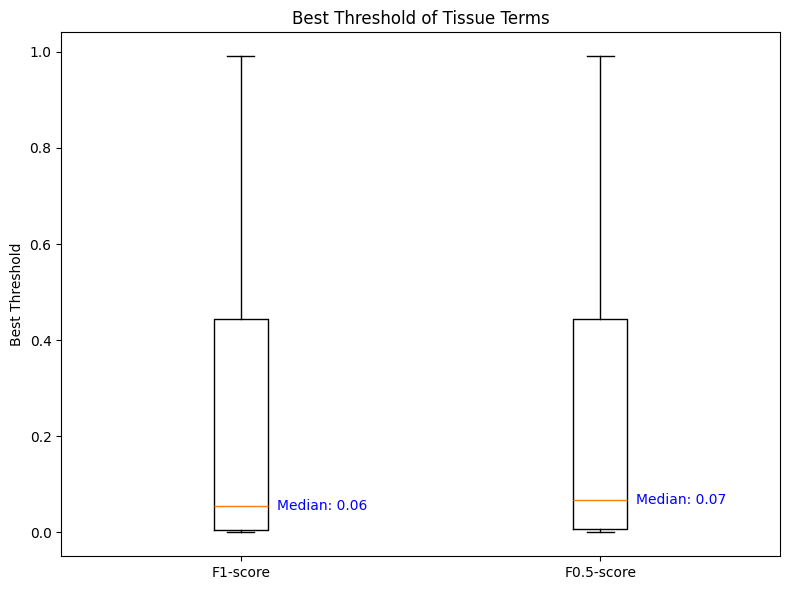

In [18]:
# boxplot for the best threshold
plt.figure(figsize=(8, 6))
plt.boxplot([best_th_df_f_merge["best_threshold_f1"], best_th_df_f_merge["best_threshold_f05"]])
median_value_f1 = best_th_df_f_merge["best_threshold_f1"].median()
median_value_f05 = best_th_df_f_merge["best_threshold_f05"].median()
plt.text(1.1, median_value_f1, f"Median: {median_value_f1:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.text(2.1, median_value_f05, f"Median: {median_value_f05:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.xticks([1, 2], ['F1-score', 'F0.5-score'])
plt.ylabel("Best Threshold")
plt.title("Best Threshold of Tissue Terms")
plt.tight_layout()
# Show the plot
plt.show()


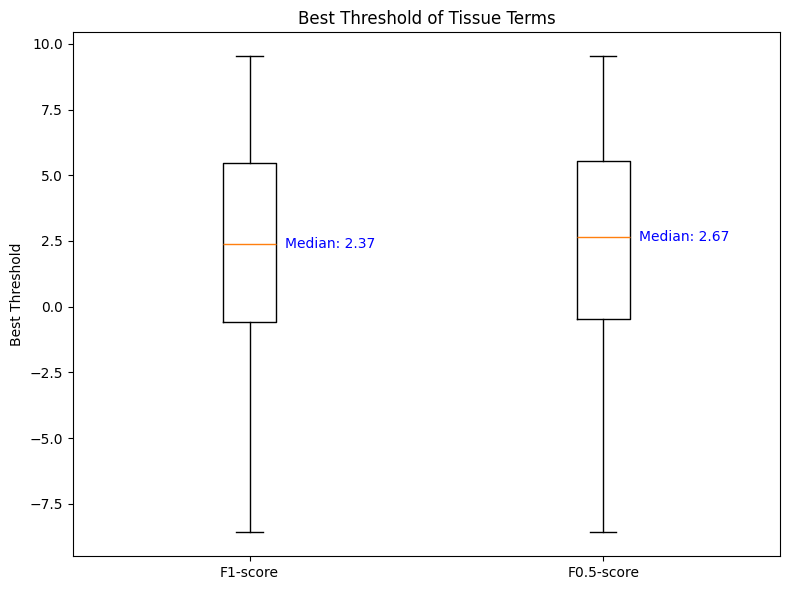

In [19]:
# boxplot for the best threshold
plt.figure(figsize=(8, 6))
plt.boxplot([best_th_df_f_merge["log2(best_th/prior)_f1"], best_th_df_f_merge["log2(best_th/prior)_f05"]])
median_value_f1 = best_th_df_f_merge["log2(best_th/prior)_f1"].median()
median_value_f05 = best_th_df_f_merge["log2(best_th/prior)_f05"].median()
plt.text(1.1, median_value_f1, f"Median: {median_value_f1:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.text(2.1, median_value_f05, f"Median: {median_value_f05:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.xticks([1, 2], ['F1-score', 'F0.5-score'])
plt.ylabel("Best Threshold")
plt.title("Best Threshold of Tissue Terms")
plt.tight_layout()
# Show the plot
plt.show()

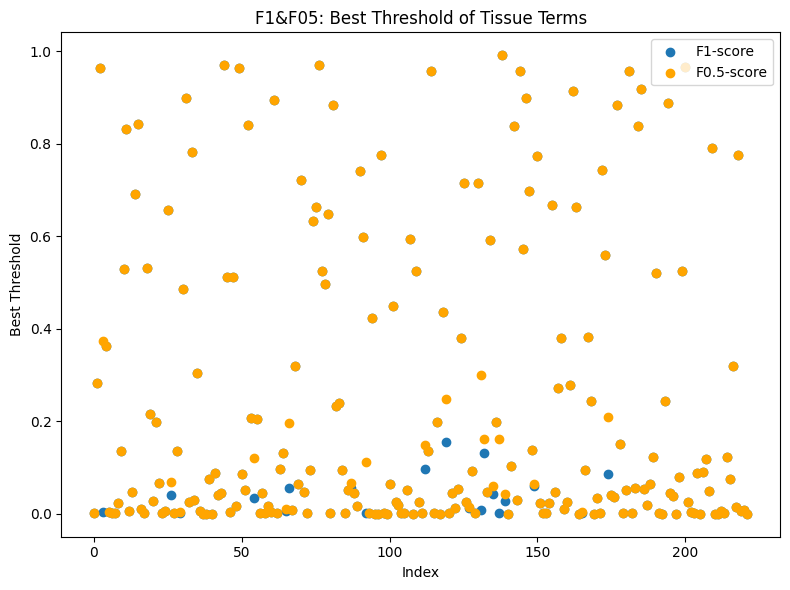

In [20]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(best_th_df_f_merge.index, best_th_df_f_merge["best_threshold_f1"], label='F1-score',)
plt.scatter(best_th_df_f_merge.index, best_th_df_f_merge["best_threshold_f05"], label='F0.5-score', c = "orange")
plt.xlabel("Index")
plt.ylabel("Best Threshold")
plt.title("F1&F05: Best Threshold of Tissue Terms")
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

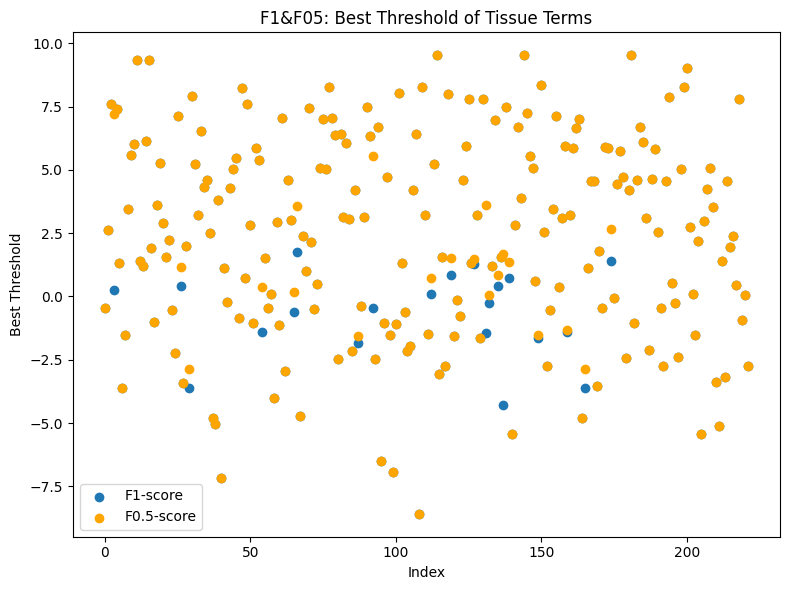

In [21]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(best_th_df_f_merge.index, best_th_df_f_merge["log2(best_th/prior)_f1"], label='F1-score',)
plt.scatter(best_th_df_f_merge.index, best_th_df_f_merge["log2(best_th/prior)_f05"], label='F0.5-score', c = "orange")
plt.xlabel("Index")
plt.ylabel("Best Threshold")
plt.title("F1&F05: Best Threshold of Tissue Terms")
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

In [22]:
# the top terms having the highest threshold
th_top_10_f1 = best_th_df_f1.sort_values(by="best_threshold", ascending = False).head(10)
th_top_10_f1

,task,best_threshold,prior,log2(auprc/prior),log2(best_th/prior),name
138,UBERON:0000956,0.990849,0.005528,5.524471,7.485752,cerebral cortex
76,UBERON:0003937,0.970094,0.029363,5.089872,5.046069,reproductive gland
44,UBERON:0005399,0.970068,0.029363,5.089872,5.046029,male reproductive gland
200,UBERON:0001871,0.965568,0.001841,9.085030,9.034480,temporal lobe
2,UBERON:0002020,0.963025,0.004940,7.285049,7.606876,gray matter
49,UBERON:0011215,0.962846,0.004940,7.284968,7.606608,central nervous system cell part cluster
181,UBERON:0002894,0.956205,0.001292,9.595879,9.531271,olfactory cortex
144,UBERON:0004725,0.956202,0.001292,9.595879,9.531266,piriform cortex
114,UBERON:0002973,0.956189,0.001292,9.595879,9.531247,parahippocampal gyrus
185,UBERON:0011143,0.917085,0.013506,6.210289,6.085416,upper urinary tract


In [23]:
# the top terms having the highest threshold
th_top_10_f05 = best_th_df_f05.sort_values(by="best_threshold", ascending = False).head(10)
th_top_10_f05

,task,best_threshold,prior,log2(auprc/prior),log2(best_th/prior),name
138,UBERON:0000956,0.990849,0.005528,5.524471,7.485752,cerebral cortex
76,UBERON:0003937,0.970094,0.029363,5.089872,5.046069,reproductive gland
44,UBERON:0005399,0.970068,0.029363,5.089872,5.046029,male reproductive gland
200,UBERON:0001871,0.965568,0.001841,9.085030,9.034480,temporal lobe
2,UBERON:0002020,0.963025,0.004940,7.285049,7.606876,gray matter
49,UBERON:0011215,0.962846,0.004940,7.284968,7.606608,central nervous system cell part cluster
181,UBERON:0002894,0.956205,0.001292,9.595879,9.531271,olfactory cortex
144,UBERON:0004725,0.956202,0.001292,9.595879,9.531266,piriform cortex
114,UBERON:0002973,0.956189,0.001292,9.595879,9.531247,parahippocampal gyrus
185,UBERON:0011143,0.917085,0.013506,6.210289,6.085416,upper urinary tract


Analysis:  
The distribution of the best thresholds across the issue terms are very similar with a median of 0.06 for F1 and 0.07 for F0.5.   
The higher median of the best threshold for F0.5 makes sense. F0.5 emphasizes precision. To have higher precision, a higher best threshold is chosen to yield fewer false positives.  

### txt2onto models label

In [24]:
# F1: combine the best threshold, prior, ic, pos, logarprc
prior = []
ic = []
pos = []
auprcprior = []
for i in best_th_df_f1["task"]:
    prior_df_sub = prior_df[["Unnamed: 0", i]]
    prior_df_sub = prior_df_sub[(prior_df_sub != 0).all(axis=1)]
    prior_df_sub[i] = prior_df_sub[i].replace(-1, 0)
    prior.append(prior_df_sub[i].mean())
    ic_value = ic_df.loc[ic_df['node'] == i, 'IC'].values[0]
    ic.append(ic_value)
    pos_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'num_of_pos'].values[0]
    pos.append(pos_value)
    auprc_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'log2(auprc/prior)'].values[0]
    auprcprior.append(auprc_value)

# data used to train txt2onto
txt2onto_label_f1 = pd.DataFrame({"task": best_th_df_f1["task"], "best_threshold": best_th_df_f1["best_threshold"], "prior": prior, "ic": ic, "num_of_pos": pos, "log2(auprc/prior)": auprcprior})
txt2onto_label_f1 = txt2onto_label_f1.merge(id_map, left_on="task", right_on="id", how="left")
txt2onto_label_f1 = txt2onto_label_f1.drop(columns=["id"])
txt2onto_label_f1

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
0,UBERON:0002435,0.002176,0.000475,6.200953,10,9.390408,striatum
1,UBERON:0000955,0.282196,0.085881,2.067788,2394,3.632799,brain
2,UBERON:0002020,0.963025,0.016515,2.488143,387,3.393686,gray matter
3,UBERON:0000165,0.003090,0.008627,2.936865,286,3.000259,mouth
4,CL:0000576,0.363368,0.011456,7.268793,304,5.531797,monocyte
...,...,...,...,...,...,...,...
217,UBERON:0013754,0.014725,0.000827,5.134089,9,8.415853,integumentary system layer
218,UBERON:0004807,0.775410,0.005022,5.041716,168,5.159565,respiratory system epithelium
219,UBERON:0011300,0.005545,0.017519,3.333409,405,5.328570,gray matter of telencephalon
220,UBERON:0000459,0.008452,0.004084,6.447813,112,7.718440,uterine wall


In [25]:
# F0.5: combine the best threshold, prior, ic, pos, logarprc
prior = []
ic = []
pos = []
auprcprior = []
for i in best_th_df_f05["task"]:
    prior_df_sub = prior_df[["Unnamed: 0", i]]
    prior_df_sub = prior_df_sub[(prior_df_sub != 0).all(axis=1)]
    prior_df_sub[i] = prior_df_sub[i].replace(-1, 0)
    prior.append(prior_df_sub[i].mean())
    ic_value = ic_df.loc[ic_df['node'] == i, 'IC'].values[0]
    ic.append(ic_value)
    pos_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'num_of_pos'].values[0]
    pos.append(pos_value)
    auprc_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'log2(auprc/prior)'].values[0]
    auprcprior.append(auprc_value)

# data used to train txt2onto
txt2onto_label_f05 = pd.DataFrame({"task": best_th_df_f05["task"], "best_threshold": best_th_df_f05["best_threshold"], "prior": prior, "ic": ic, "num_of_pos": pos, "log2(auprc/prior)": auprcprior})
txt2onto_label_f05 = txt2onto_label_f05.merge(id_map, left_on="task", right_on="id", how="left")
txt2onto_label_f05 = txt2onto_label_f05.drop(columns=["id"])
txt2onto_label_f05

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
0,UBERON:0002435,0.002176,0.000475,6.200953,10,9.390408,striatum
1,UBERON:0000955,0.282196,0.085881,2.067788,2394,3.632799,brain
2,UBERON:0002020,0.963025,0.016515,2.488143,387,3.393686,gray matter
3,UBERON:0000165,0.373765,0.008627,2.936865,286,3.000259,mouth
4,CL:0000576,0.363368,0.011456,7.268793,304,5.531797,monocyte
...,...,...,...,...,...,...,...
217,UBERON:0013754,0.014725,0.000827,5.134089,9,8.415853,integumentary system layer
218,UBERON:0004807,0.775410,0.005022,5.041716,168,5.159565,respiratory system epithelium
219,UBERON:0011300,0.005545,0.017519,3.333409,405,5.328570,gray matter of telencephalon
220,UBERON:0000459,0.008452,0.004084,6.447813,112,7.718440,uterine wall


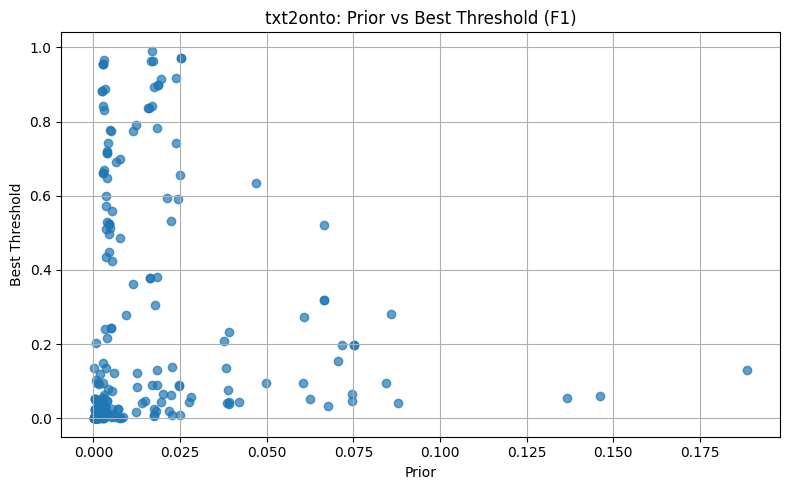

In [56]:
# prior
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['prior'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['prior'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['prior'], m * txt2onto_label_f1['prior'] + b, color='blue', label='Regression line')

plt.xlabel('Prior')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Prior vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# points on the very right of the plot
far_right_points_f1 = txt2onto_label_f1.sort_values(by = "prior", ascending = False).head()
far_right_points_f1

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
132,UBERON:0000178,0.131609,0.188661,7.181782,5092,2.216790,blood
149,CL:0000738,0.059901,0.146251,4.703844,4106,2.650433,leukocyte
87,CL:0000842,0.055724,0.136706,4.887565,3654,2.307990,mononuclear cell
26,UBERON:0001017,0.040122,0.087979,1.910922,1994,2.766217,central nervous system
1,UBERON:0000955,0.282196,0.085881,2.067788,2394,3.632799,brain


In [27]:
# points on the top left corner of the plot
top_left_points_f1 = txt2onto_label_f1.sort_values(by = "best_threshold", ascending = False).head()
top_left_points_f1

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
138,UBERON:0000956,0.990849,0.017044,3.511831,452,6.197845,cerebral cortex
76,UBERON:0003937,0.970094,0.025230,5.235872,657,5.060890,reproductive gland
44,UBERON:0005399,0.970068,0.025230,5.539554,657,5.060890,male reproductive gland
200,UBERON:0001871,0.965568,0.003200,5.224037,77,8.039148,temporal lobe
2,UBERON:0002020,0.963025,0.016515,2.488143,387,3.393686,gray matter


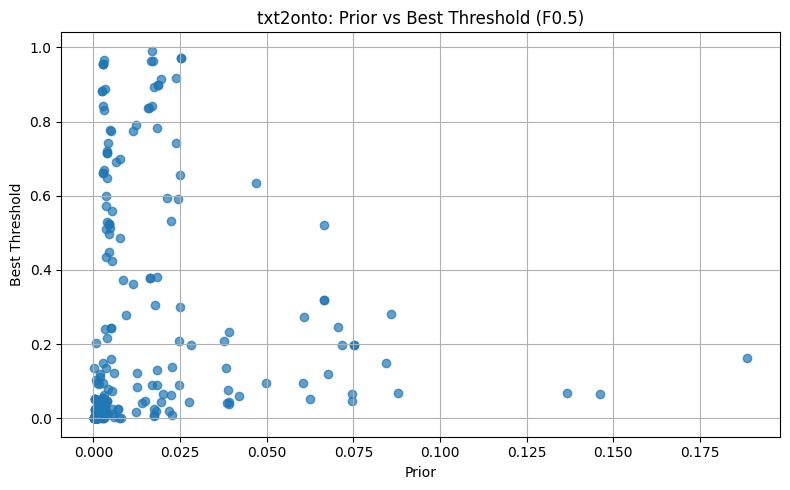

In [59]:
# prior
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['prior'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['prior'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['prior'], m * txt2onto_label_f05['prior'] + b, color='blue', label='Regression line')

plt.xlabel('Prior')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Prior vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# points on the very right of the plot
far_right_points_f05 = txt2onto_label_f05.sort_values(by = "prior", ascending = False).head()
far_right_points_f05

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
132,UBERON:0000178,0.162684,0.188661,7.181782,5092,2.216790,blood
149,CL:0000738,0.065174,0.146251,4.703844,4106,2.650433,leukocyte
87,CL:0000842,0.067537,0.136706,4.887565,3654,2.307990,mononuclear cell
26,UBERON:0001017,0.069229,0.087979,1.910922,1994,2.766217,central nervous system
1,UBERON:0000955,0.282196,0.085881,2.067788,2394,3.632799,brain


In [29]:
# points on the top left corner of the plot
top_left_points_f05 = txt2onto_label_f05.sort_values(by = "best_threshold", ascending = False).head()
top_left_points_f05

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior),name
138,UBERON:0000956,0.990849,0.017044,3.511831,452,6.197845,cerebral cortex
76,UBERON:0003937,0.970094,0.025230,5.235872,657,5.060890,reproductive gland
44,UBERON:0005399,0.970068,0.025230,5.539554,657,5.060890,male reproductive gland
200,UBERON:0001871,0.965568,0.003200,5.224037,77,8.039148,temporal lobe
2,UBERON:0002020,0.963025,0.016515,2.488143,387,3.393686,gray matter


Analysis:  
1. check the very right three points and a few points on the top-left corner. What are they?  

    For both F1 and F0.5, the three points on the very right side of the plot are:  
        UBERON:0000178 (blood),  
        CL:0000738 (leukocyte),  
        CL:0000842 (mononuclear leukocyte).  
        They seem like still pretty high level terms.  

    Some exmaples on the top-left corner of the plot are (same for both F1 and F0.5, ):  
        UBERON:0000956 (cerebral cortex),  
        UBERON:0003937 (reproductive gland),  
        UBERON:0005399 (male reproductive gland),  
        UBERON:0001871 (temporal lobe),  
        UBERON:0002020 (gray matter).  

2. Relationship between prior and best threshold.  
    x: Prior - The proportion of positive samples.   
    y: Best threshold - the threshold that yields the best F1/0.5 socre.  

    a. Most terms have very low prior (<0.025).  
    b. The majority of the best thresholds fall between 0.0 and 0.1 with low prior.  
    c. As the prior increases, best thresholds slightly shift upward but not linearly.  
    d. No clear linear trend overall. Most data points are concentrated on the left side of the plot. When the prior is low (<0.025), the best thresholds are widely distributed, ranging from 0 to 1.  

    Takeaway: there no apperent relationship between prior and the best threshold. The best thresholds spread widely when the prior is low, and this covers most of the terms. It could sugguest that a term-specific threshold is important for each term.  

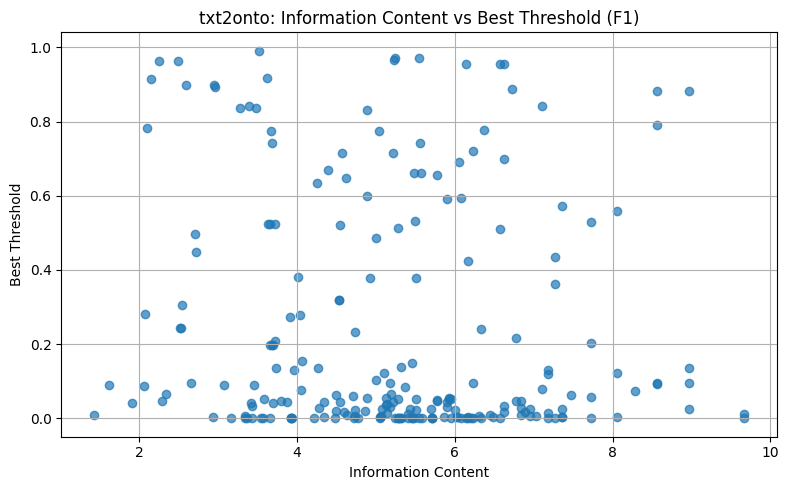

In [62]:
# Information Content
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['ic'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['ic'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['ic'], m * txt2onto_label_f1['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Information Content vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

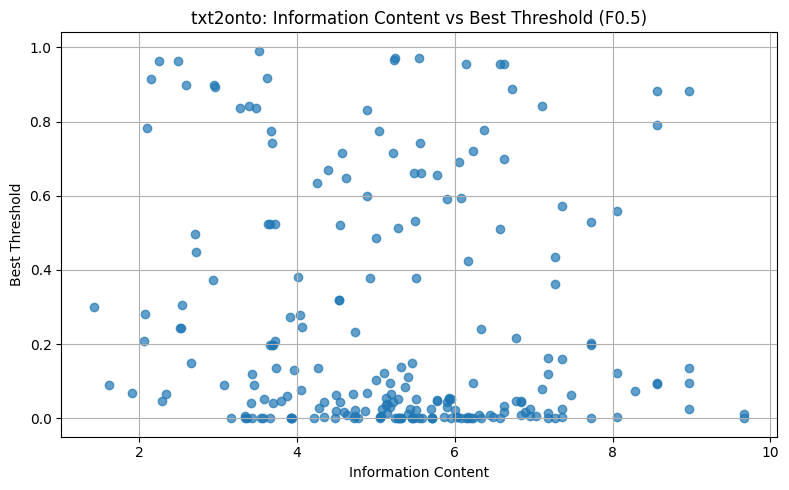

In [63]:
# Information Content
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['ic'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['ic'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['ic'], m * txt2onto_label_f05['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Information Content vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between Information Content (IC) and Best Threshold.  
    x: Information Content - measure how specific a term is in the ontology strucutre. Higher value means more specific.   
    y: Best threshold - the threshold that yields the best F1/0.5 socre.  

    a. Most best thresholds fall between the 0.0 and 0.1 regardless of information content.  
    b. Most of the terms are with moderate IC (3 to 7) meaning that they are not too specific nor too general terms, and their best thresholds vary widely (0.0 to 1.0).  
    c. The terms with very high (>7) and very low (<3) IC tend to have low best threshold.  

    Takeaway: There is no clear linear relationship between IC and best threshold. Most terms are middle IC terms (not too specific, not too general) with widely distributed best thresholds. But in general, a low threshold tends to be the best regardless of IC.  

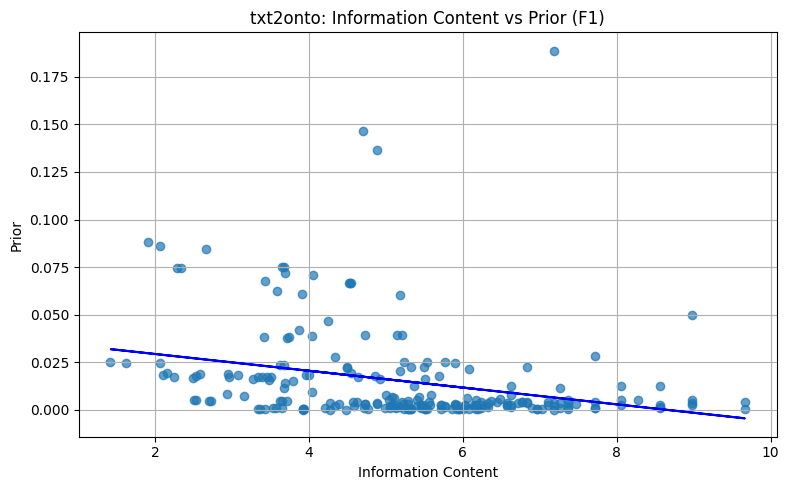

In [42]:
# Prior vs IC: Compare the prior with informaton content, they should be negatively correlated.
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['ic'], txt2onto_label_f1['prior'], alpha = 0.7)

# Fit a linear regression line
m, b = np.polyfit(txt2onto_label_f1['ic'], txt2onto_label_f1['prior'], 1)
plt.plot(txt2onto_label_f1['ic'], m * txt2onto_label_f1['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Prior')
plt.title('txt2onto: Information Content vs Prior (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

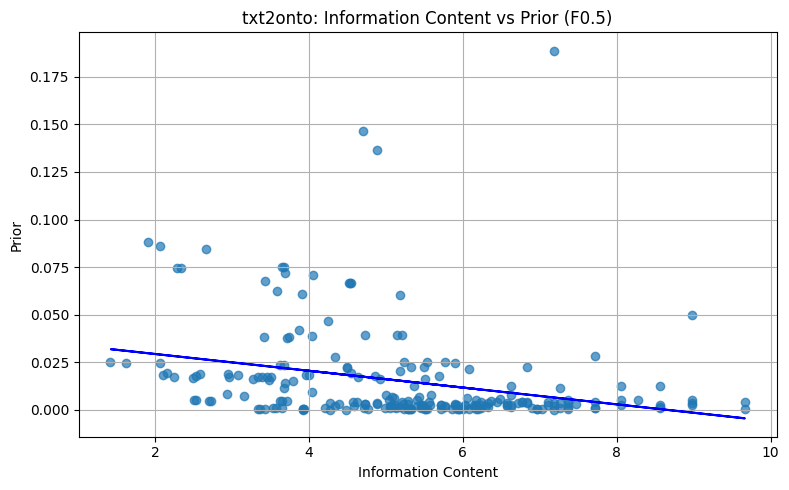

In [41]:
# Prior vs IC
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['ic'], txt2onto_label_f05['prior'], alpha = 0.7)

# Fit a linear regression line
m, b = np.polyfit(txt2onto_label_f05['ic'], txt2onto_label_f05['prior'], 1)
plt.plot(txt2onto_label_f05['ic'], m * txt2onto_label_f05['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Prior')
plt.title('txt2onto: Information Content vs Prior (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

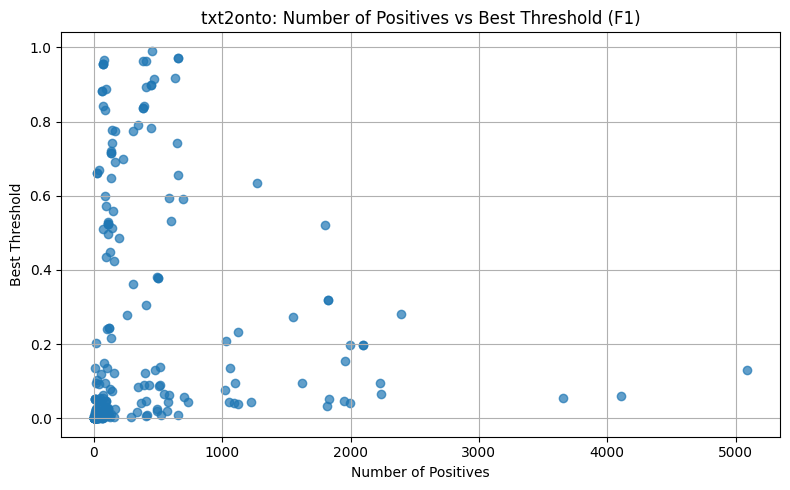

In [64]:
# Number of Positives
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['num_of_pos'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['num_of_pos'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['num_of_pos'], m * txt2onto_label_f1['num_of_pos'] + b, color='blue', label='Regression line')

plt.xlabel('Number of Positives')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Number of Positives vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show() 

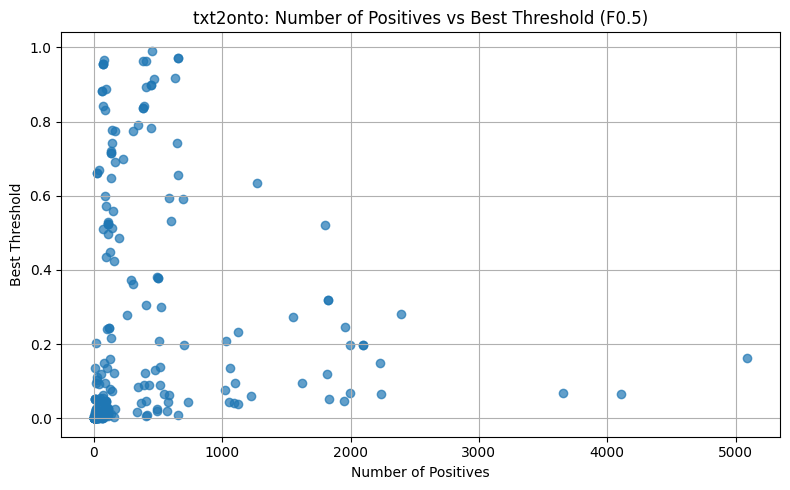

In [65]:
# Number of Positives
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['num_of_pos'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['num_of_pos'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['num_of_pos'], m * txt2onto_label_f05['num_of_pos'] + b, color='blue', label='Regression line')

plt.xlabel('Number of Positives')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Number of Positives vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between the number of positives and Best Threshold.  
    x: Number of Positives - the count of positive samples for each term.  
    y: Best threshold - the threshold that yields the best F1/0.5 socre.  

    a. Similar to prior, the distribution of the terms highly skews to the left (low positive counts). Most of the terms have less than 1000 positive samples.  
    b. The terms with low positive counts have wide range (0 to 1) of best thresholds.  
    c. As the positive counts increase, the best thresholds remain low.   

    Takeaway: there is no apperent correlation between positive counts and the best threshold. 
    Most of the terms have less than 1000 positive samples. When the number of positives is low, the best thresholds are widely distributed. As the number of positives increases, there is no apparent upward trend in the best threshold values.  

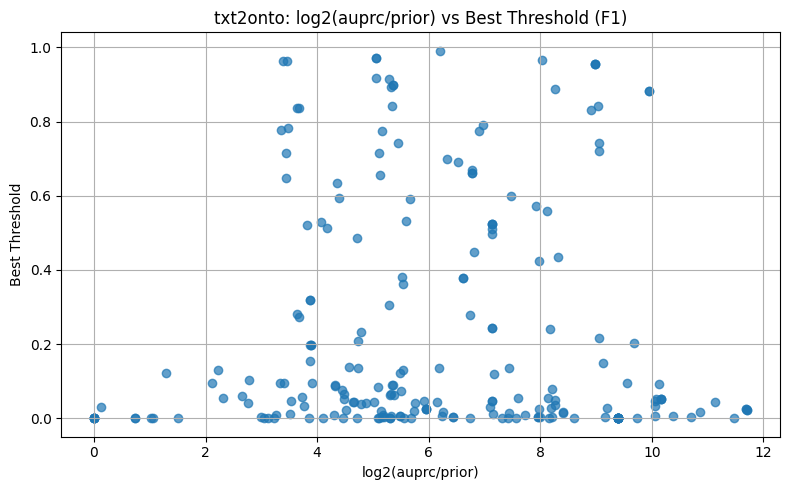

In [66]:
# log2(auprc/prior)
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f1['log2(auprc/prior)'], txt2onto_label_f1['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f1['log2(auprc/prior)'], txt2onto_label_f1['best_threshold'], 1)
#plt.plot(txt2onto_label_f1['log2(auprc/prior)'], m * txt2onto_label_f1['log2(auprc/prior)'] + b, color='blue', label='Regression line')

plt.xlabel('log2(auprc/prior)')
plt.ylabel('Best Threshold')
plt.title('txt2onto: log2(auprc/prior) vs Best Threshold (F1)')
plt.grid(True)
plt.tight_layout()
plt.show()

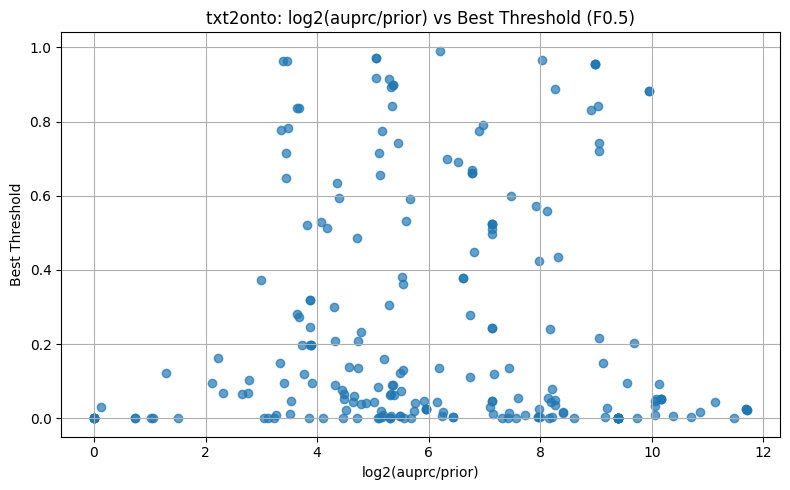

In [67]:
# log2(auprc/prior)
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label_f05['log2(auprc/prior)'], txt2onto_label_f05['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label_f05['log2(auprc/prior)'], txt2onto_label_f05['best_threshold'], 1)
#plt.plot(txt2onto_label_f05['log2(auprc/prior)'], m * txt2onto_label_f05['log2(auprc/prior)'] + b, color='blue', label='Regression line')

plt.xlabel('log2(auprc/prior)')
plt.ylabel('Best Threshold')
plt.title('txt2onto: log2(auprc/prior) vs Best Threshold (F0.5)')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between log2(auprc/prior) and Best Threshold.  
    x: log2(auprc/prior) - a nomalized metric evaluating the model performance relative to a random classifier.  
    y: Best threshold - the threshold that yields the best F1/0.5 socre.  

    a. Most of the terms have a low best threshold (0.0 to 0.1) regardless of the model performance.  
    b. Higher thresholds appear mostly on the models with mid-range performance (3 to 8).  
    c. The models with mid-range performance (3 to 8) have wide range of the best thresholds. 

    Takeaway: There is no clear linear relationship between the model performance (log2(auprc/prior)) and the Best Threshold. Low thresholds can generally be used on most of the models.  

### sampleLASSO microarray ground truth label

In [30]:
samplelasso_label_f1 = samplelasso_label_f1.merge(id_map, left_on="task", right_on="id", how="left")
samplelasso_label_f1 = samplelasso_label_f1.drop(columns=["id"])
samplelasso_label_f1.head()

,task,best_threshold,prior,num_of_pos,num_of_pred_pos,name
0,UBERON:0002435,0.002176,0.000577,18,33,striatum
1,UBERON:0000955,0.282196,0.034763,1138,3667,brain
2,UBERON:0002020,0.963025,0.013443,427,22,gray matter
3,UBERON:0000165,0.003090,0.030977,951,2884,mouth
4,CL:0000576,0.363368,0.006238,166,504,monocyte


In [31]:
samplelasso_label_f05 = samplelasso_label_f05.merge(id_map, left_on="task", right_on="id", how="left")
samplelasso_label_f05 = samplelasso_label_f05.drop(columns=["id"])
samplelasso_label_f05.head()

,task,best_threshold,prior,num_of_pos,num_of_pred_pos,name
0,UBERON:0002435,0.002176,0.000577,18,33,striatum
1,UBERON:0000955,0.282196,0.034763,1138,3667,brain
2,UBERON:0002020,0.963025,0.013443,427,22,gray matter
3,UBERON:0000165,0.373765,0.030977,951,262,mouth
4,CL:0000576,0.363368,0.006238,166,504,monocyte


In [32]:
samplelasso_label_f1.shape, samplelasso_label_f05.shape

((222, 6), (222, 6))

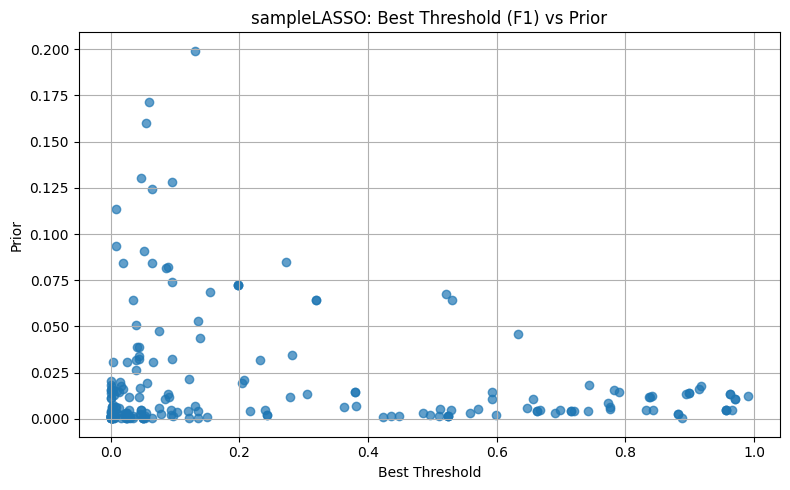

In [71]:
# Prior
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['prior'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['prior'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Prior')
plt.title('sampleLASSO: Best Threshold (F1) vs Prior')
plt.grid(True)
plt.tight_layout()
plt.show()


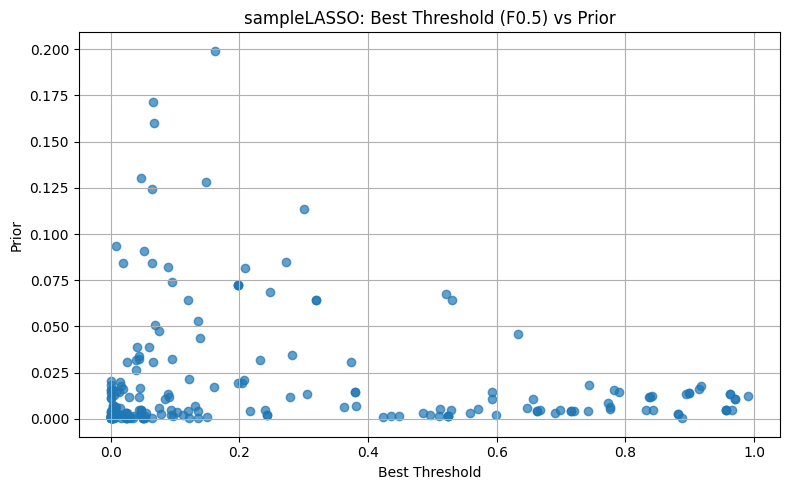

In [72]:
# Prior
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['prior'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['prior'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Prior')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Prior')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between the Best Threshold and prior.  
    x: Best threshold - the threshold that yields the best F1/0.5 socre.  
    y: Prior - The proportion of positive samples.   

    The terms on the upper left corner of the plot are:  
    UBERON:0000178 (blood)  
    CL:0000738 (leukocyte)  
    CL:0000842 (mononuclear leukocyte)  

    a. Most terms with low best thresholds (<0.1) have low prior (<0.02).  
    b. The best thresholds widely spread at low priors (<0.02).  
    c. The high thresholds (>0.4) is only seen at low priors.  

    Takeaway: there is not clear linear pattern between the best threshold and the prior of sampleLASSO. Most of the terms have low best threshold and low prior. As the best threshold increases, the prior remains low. For the terms with low prior, the best threshold varies widely.  

In [33]:
# terms with highest prior
gt_prior_top_10_f1 = samplelasso_label_f1.sort_values(by="prior", ascending = False).head(10)
gt_prior_top_10_f1

,task,best_threshold,prior,num_of_pos,num_of_pred_pos,name
132,UBERON:0000178,0.131609,0.199178,6248,16242,blood
149,CL:0000738,0.059901,0.171538,5018,33769,leukocyte
87,CL:0000842,0.055724,0.159902,4649,27068,mononuclear cell
156,UBERON:0001555,0.047164,0.130225,4312,11141,digestive tract
112,UBERON:0013765,0.095884,0.128242,4233,9702,digestive system element
100,UBERON:0004921,0.064553,0.124434,4093,9626,subdivision of digestive tract
131,UBERON:0001434,0.008883,0.113519,3729,12669,skeletal system
67,UBERON:0002371,0.008268,0.093286,2537,8539,bone marrow
51,UBERON:0005409,0.052423,0.091103,2989,6792,alimentary part of gastrointestinal system
157,UBERON:0000160,0.272234,0.084855,2784,3138,intestine


In [34]:
# terms with highest prior
gt_prior_top_10_f05 = samplelasso_label_f05.sort_values(by="prior", ascending = False).head(10)
gt_prior_top_10_f05

,task,best_threshold,prior,num_of_pos,num_of_pred_pos,name
132,UBERON:0000178,0.162684,0.199178,6248,15216,blood
149,CL:0000738,0.065174,0.171538,5018,31676,leukocyte
87,CL:0000842,0.067537,0.159902,4649,23962,mononuclear cell
156,UBERON:0001555,0.047164,0.130225,4312,11141,digestive tract
112,UBERON:0013765,0.148659,0.128242,4233,7253,digestive system element
100,UBERON:0004921,0.064553,0.124434,4093,9626,subdivision of digestive tract
131,UBERON:0001434,0.300034,0.113519,3729,1047,skeletal system
67,UBERON:0002371,0.008268,0.093286,2537,8539,bone marrow
51,UBERON:0005409,0.052423,0.091103,2989,6792,alimentary part of gastrointestinal system
157,UBERON:0000160,0.272234,0.084855,2784,3138,intestine


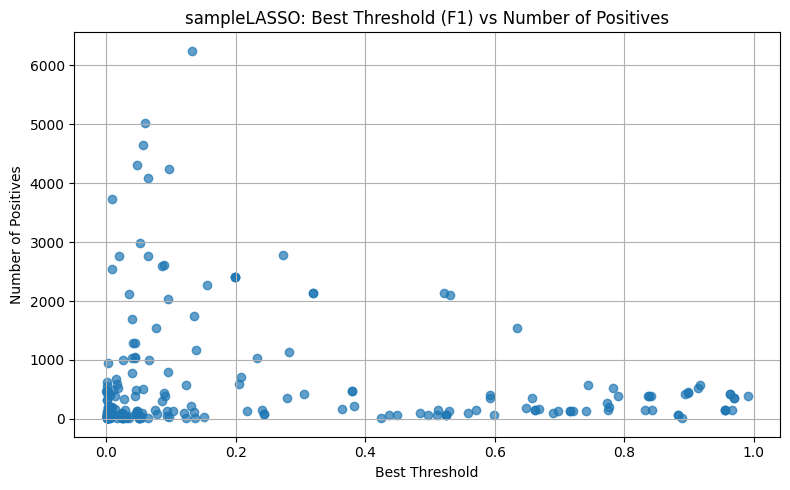

In [75]:
# Number of Positives
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pos'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pos'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Positives')
plt.title('sampleLASSO: Best Threshold (F1) vs Number of Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

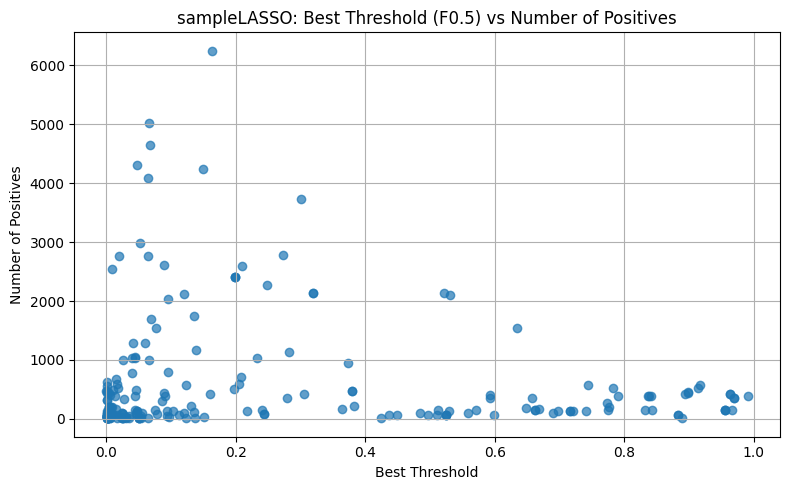

In [76]:
# Number of Positives
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pos'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pos'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Positives')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Number of Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between the number of positives and Best Threshold.  
    x: Best threshold - the threshold that yields the best F1/0.5 socre.  
    y: Number of Positives - the count of positive samples for each term.  

    Takeaway: Similar to prior, there is not clear linear pattern between the best threshold and the Number of Positives in sampleLASSO. Most of the terms have low best threshold and low number of positives. As the best threshold increases, the number of positives remains low. For the terms with small number of positives, the best threshold varies widely.  

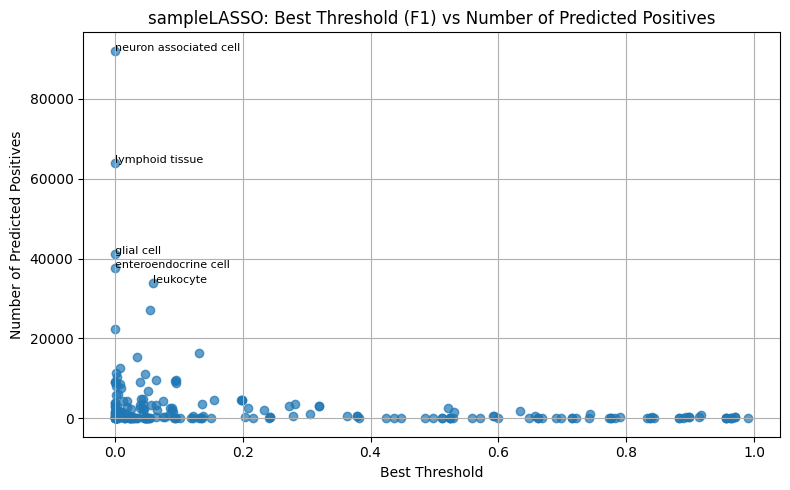

In [37]:
# Number of Predicted Positives
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pred_pos'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f1['best_threshold'], samplelasso_label_f1['num_of_pred_pos'], 1)
#plt.plot(samplelasso_label_f1['best_threshold'], m * samplelasso_label_f1['best_threshold'] + b, color='blue', label='Regression line')

# Add labels for points above 30000
for i, row in samplelasso_label_f1.iterrows():
    if row['num_of_pred_pos'] > 30000:
        plt.text(row['best_threshold'], row['num_of_pred_pos'], row['name'], fontsize=8, ha='left')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Predicted Positives')
plt.title('sampleLASSO: Best Threshold (F1) vs Number of Predicted Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

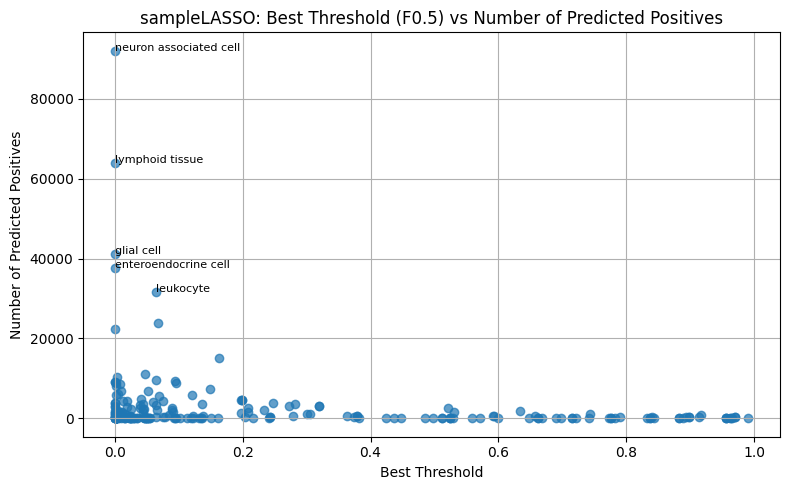

In [ ]:
# Number of Predicted Positives
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pred_pos'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label_f05['best_threshold'], samplelasso_label_f05['num_of_pred_pos'], 1)
#plt.plot(samplelasso_label_f05['best_threshold'], m * samplelasso_label_f05['best_threshold'] + b, color='blue', label='Regression line')

# Add labels for points above 30000
for i, row in samplelasso_label_f05.iterrows():
    if row['num_of_pred_pos'] > 30000:
        plt.text(row['best_threshold'], row['num_of_pred_pos'], row['name'], fontsize=8, ha='left')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Predicted Positives')
plt.title('sampleLASSO: Best Threshold (F0.5) vs Number of Predicted Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:  
1. Relationship between the number of positives and Best Threshold.  
    x: Best threshold - the threshold that yields the best F1/0.5 socre.  
    y: Number of Predicted Positives - the number of instances predicted as positive.  

    a. It seems like a inverse relationship as the best threshold increases, the number of predicted positive decreases.  
    b. High best thresholds appear only at those with very few predicted positives.  
    c. The best threshold on those with very small number of predicted positives varies widely.  

    Takeaway: With the increasing of the best threshold, the number of predicted positives remains low. When the best threshold is low, the number of predicted positive widely spreads. Most terms have low best threshold and low number of predicted positives.  